In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [8]:
vdata = pd.read_csv("C:\\Users\\Priyesh\\Downloads\\archive(4)\\vgsales.csv")


In [6]:
vdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
vdata.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [11]:
vdata.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
# Converting Year from float to integer
vdata["Year"] =  vdata["Year"].astype("Int64")

In [13]:
vdata.dtypes

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [14]:
vdata.shape

(16598, 11)

In [15]:
vdata.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
vdata.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [17]:
vdata= vdata.dropna()
print(f"Shape after droping Null: {vdata.shape}")

Shape after droping Null: (16291, 11)


In [18]:
# Cleaning by removing Duplicates and Null Value
vdata= vdata.drop_duplicates()
print(f"Shape after droping Duplicate: {vdata.shape}")

Shape after droping Duplicate: (16291, 11)


In [19]:
vdata.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
vdata.duplicated().sum()

0

In [7]:
for i in vdata.columns:
    print(i + ":", vdata[i].unique()[:10])


Rank: [ 1  2  3  4  5  6  7  8  9 10]
Name: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' 'Wii Sports Resort'
 'Pokemon Red/Pokemon Blue' 'Tetris' 'New Super Mario Bros.' 'Wii Play'
 'New Super Mario Bros. Wii' 'Duck Hunt']
Platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS']
Year: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007.]
Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting']
Publisher: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft']
NA_Sales: [41.49 29.08 15.85 15.75 11.27 23.2  11.38 14.03 14.59 26.93]
EU_Sales: [29.02  3.58 12.88 11.01  8.89  2.26  9.23  9.2   7.06  0.63]
JP_Sales: [ 3.77  6.81  3.79  3.28 10.22  4.22  6.5   2.93  4.7   0.28]
Other_Sales: [8.46 0.77 3.31 2.96 1.   0.58 2.9  2.85 2.26 0.47]
Global_Sales: [82.74 40.24 35.82 33.   31.37 30.26 

In [6]:
# Finding Most Sold Game Globally 

vdata_by_year=vdata.sort_values('Global_Sales')
vdata_by_year= vdata_by_year.sort_values('Year', ascending=True).drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales"], axis=1)
vdata_by_year = vdata_by_year.reset_index(inplace=False, drop=True)
vdata_by_year.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1971,Defender,2600,1980.0,Misc,Atari,1.05
1,2671,Boxing,2600,1980.0,Fighting,Activision,0.77
2,259,Asteroids,2600,1980.0,Shooter,Atari,4.31
3,5368,Freeway,2600,1980.0,Action,Activision,0.34
4,1768,Kaboom!,2600,1980.0,Misc,Activision,1.15
5,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.49
6,6319,Bridge,2600,1980.0,Misc,Activision,0.27
7,545,Missile Command,2600,1980.0,Shooter,Atari,2.76
8,6898,Checkers,2600,1980.0,Misc,Atari,0.24
9,1850,Megamania,2600,1981.0,Shooter,Activision,1.10


In [22]:
# Most Sold Game on The Basis of Platforms

vdata_p = vdata
vdata_p = vdata_p.sort_values('Global_Sales', ascending=False).drop_duplicates(['Platform'])
vdata_p = vdata_p.sort_values('Platform', ascending=False).drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales"], axis=1)
vdata_p = vdata_p.reset_index(inplace=False, drop=True)
vdata_p

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.30
1,80,Halo 2,XB,2004,Shooter,Microsoft Game Studios,8.49
2,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,21.82
3,109,Mario Kart 8,WiiU,2014,Racing,Nintendo,6.96
4,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
5,3933,Final Fantasy,WS,2000,Role-Playing,SquareSoft,0.51
6,9225,Doukyuusei,TG16,1995,Adventure,NEC,0.14
7,19,Super Mario World,SNES,1990,Platform,Nintendo,20.61
8,1263,Sonic CD,SCD,1993,Platform,Sega,1.50
9,890,Virtua Fighter 2,SAT,1995,Fighting,Sega,1.93


In [23]:
# Arranging On the Basis Of Publisher
vPublisher = vdata
vPublisher = vPublisher.groupby(by="Publisher")["Global_Sales"].sum().reset_index()
vPublisher = vPublisher.sort_values('Global_Sales', ascending=False).reset_index(drop=True)
vPublisher.head()


,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


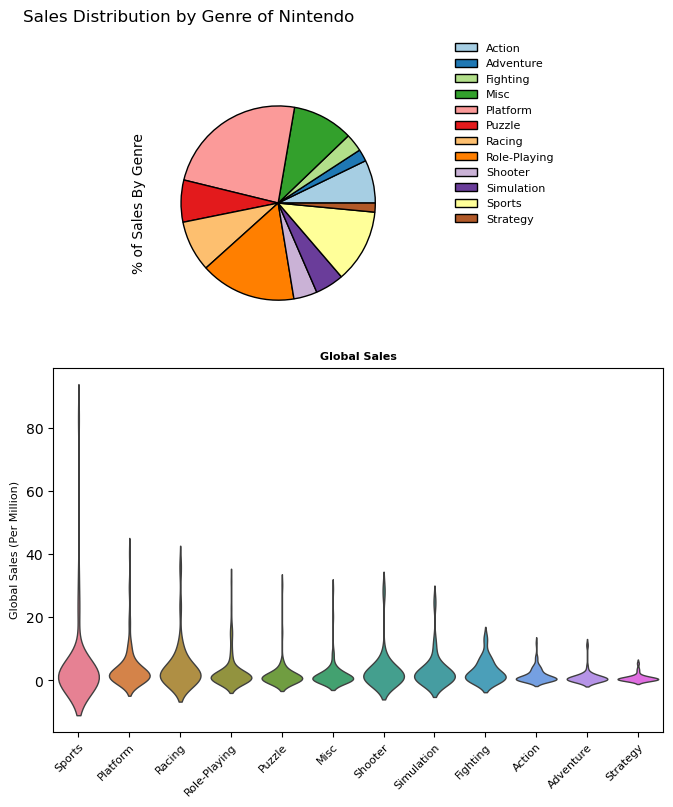

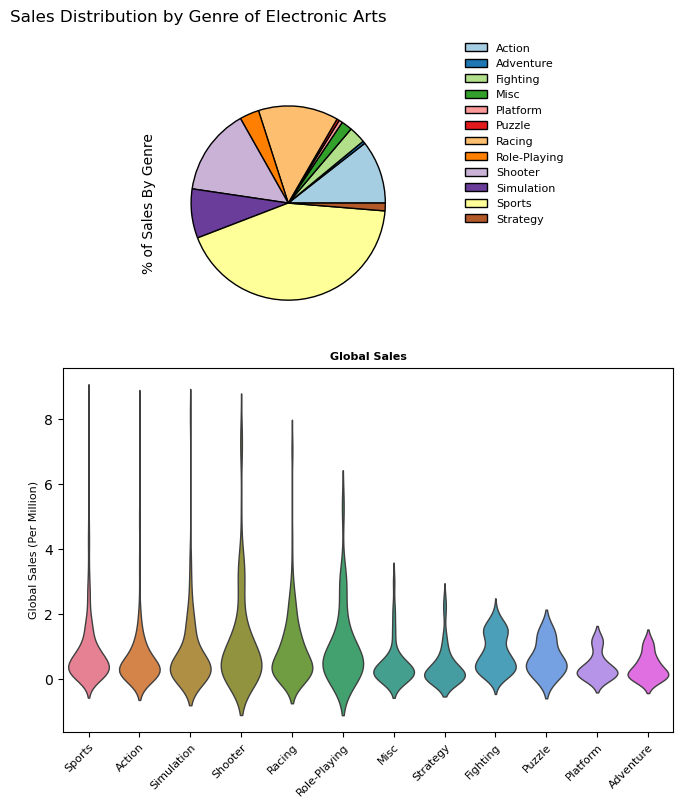

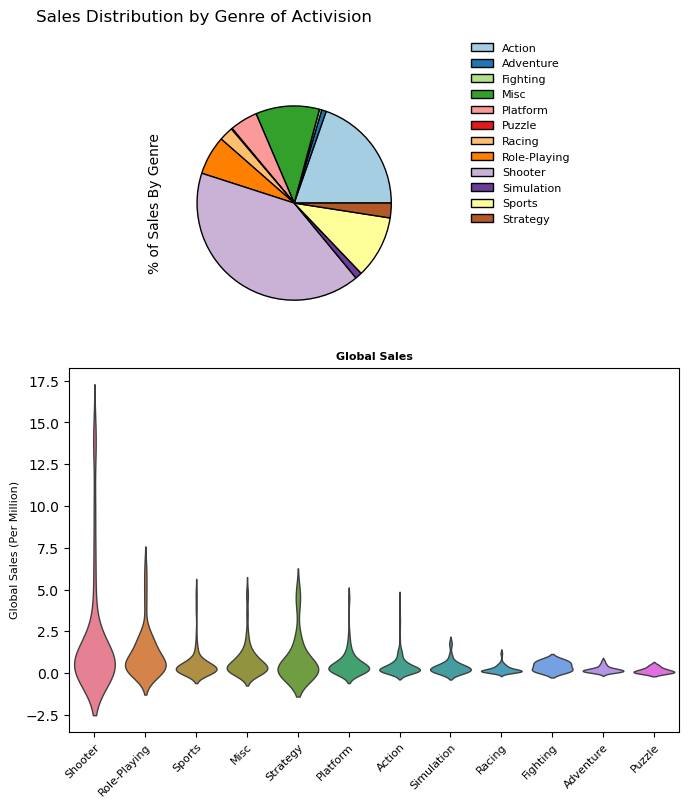

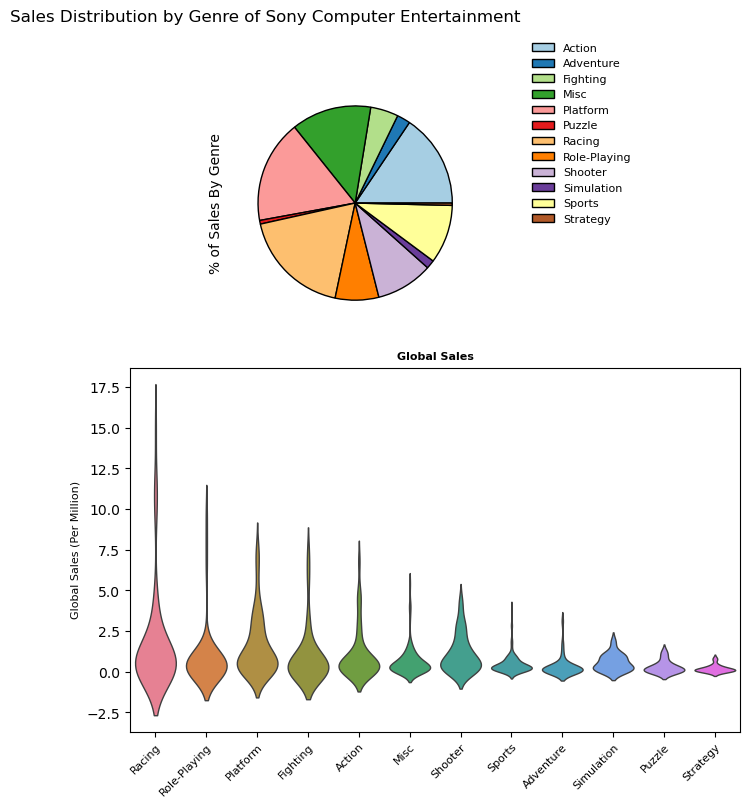

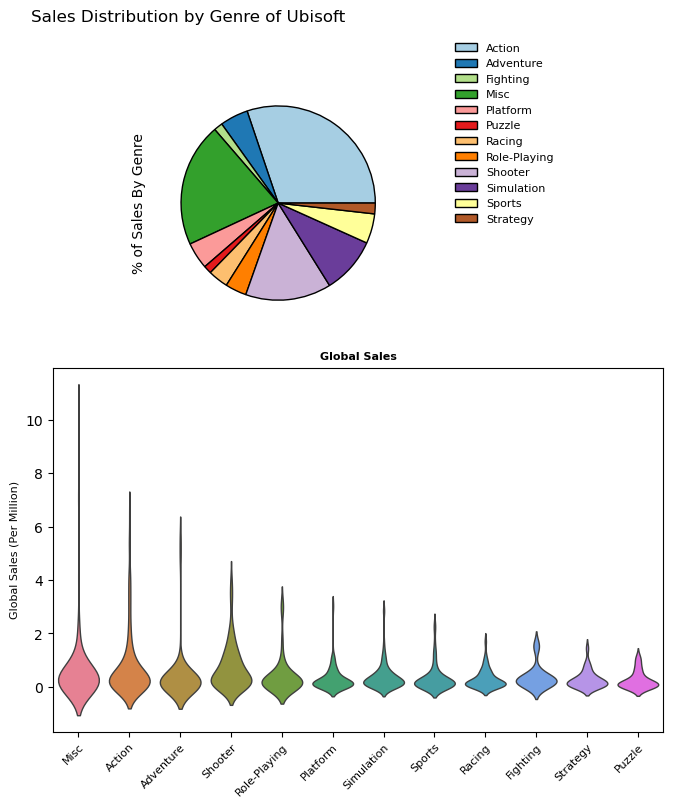

In [24]:
top5 = ["Nintendo", "Electronic Arts", "Activision", "Sony Computer Entertainment", "Ubisoft"]

# Selecting a colour palette
col1 = sns.color_palette("husl", 13)
col2 = sns.color_palette("Paired")

#Creating a for loop to generate Graph for each Publisher
for i in top5:
    
    pdata = vdata.query(f"Publisher == '{i}'")
    fig = plt.figure(figsize=(10, 8))
    
    
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 2], height_ratios=[2, 3])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    fig.suptitle(f'Sales Distribution by Genre of {i}')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=1)
    
    
    try:
        sns.violinplot(x="Genre", y="Global_Sales", data=pdata, ax=ax2, scale="width", inner=None, linewidth=1, edgecolor="black", palette=col1)
        ax2.tick_params(labelrotation=45, axis="x", labelsize=8)
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax2.set_ylabel('Global Sales (Per Million)', fontsize=8)
        ax2.set_title('Global Sales', fontsize=8, fontweight="bold")
        ax2.set_xlabel('', fontsize=8)
    except:
        pass
    
    try:
        genregroup = pdata.groupby(['Genre'])["Global_Sales"].sum()
        genregroup.plot(kind='pie', y=["Global_Sales"], ax=ax1, legend=True,labeldistance=None, wedgeprops={'edgecolor':'black','linewidth': 1, 'linestyle': 'solid'}, colors=col2)
        ax1.legend(bbox_to_anchor=(1.68,1.2), loc="upper right", prop={"size":8}, frameon=False)
        box = ax1.get_position()
        box.x0 = box.x0 - 0.08
        box.x1 = box.x1 - 0.08
        ax1.set_position(box)
        ax1.set_ylabel('% of Sales By Genre', fontsize=10)
    except:
        pass


In [54]:
x= vdata.sort_values('Year', ascending= True)
x.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5288,5290,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.1,0.07,0.03,0.35
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29


In [45]:
vdata['Genre'].nunique()

12

In [46]:
vdata['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
# From the above analysis we can see last two year data i.e. 2017 & 2020 won't contribut to our Bar Graph

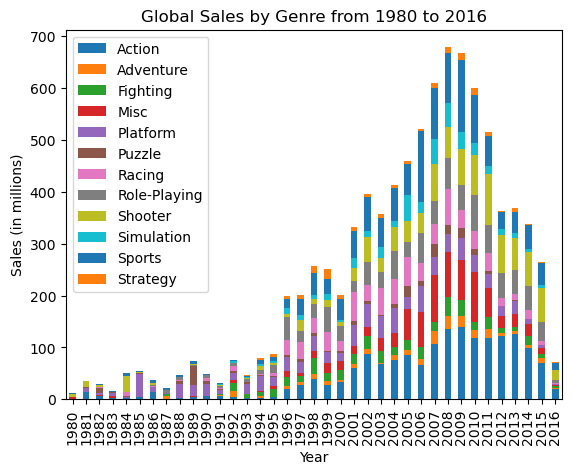

In [55]:
# So we're getting rid of it.
filtered = vdata[vdata['Year'] < 2017]
# Group the data by genre and year and sum the sales for each group
grouped_data = filtered.groupby(['Genre', 'Year']).sum().reset_index()

# Pivot the data to put the genres as columns
pivoted_data = grouped_data.pivot(index='Year', columns='Genre', values='Global_Sales')

# Create a bar plot for each genre
pivoted_data.plot(kind='bar', stacked=True)

# Add a title, labels, and legend to the plot
plt.title('Global Sales by Genre from 1980 to 2016')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend()

# Show the plot
plt.show()


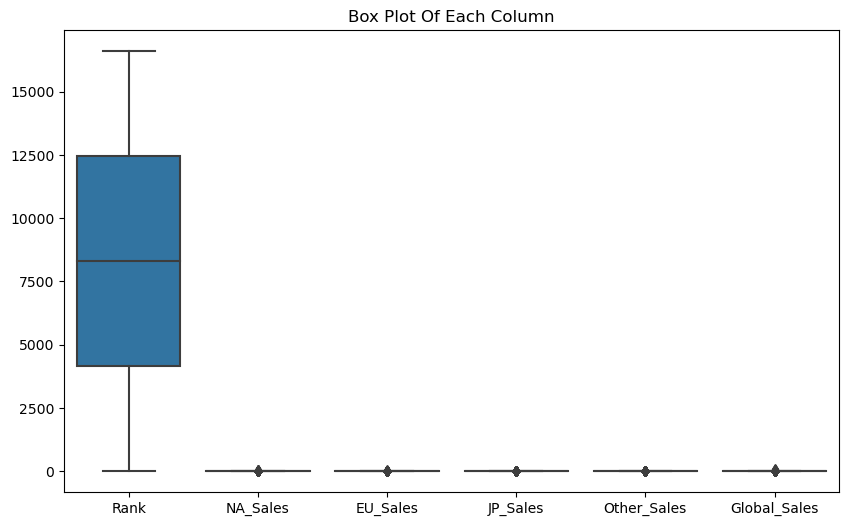

In [87]:
# Box Plotting in Order to remove Outliers
data_drop= vdata.drop(['Year'],axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_drop, width=0.8)


plt.title('Box Plot Of Each Column')

# Show the plot
plt.show()




The distribution of game sales by genre can be seen in the boxplots below:



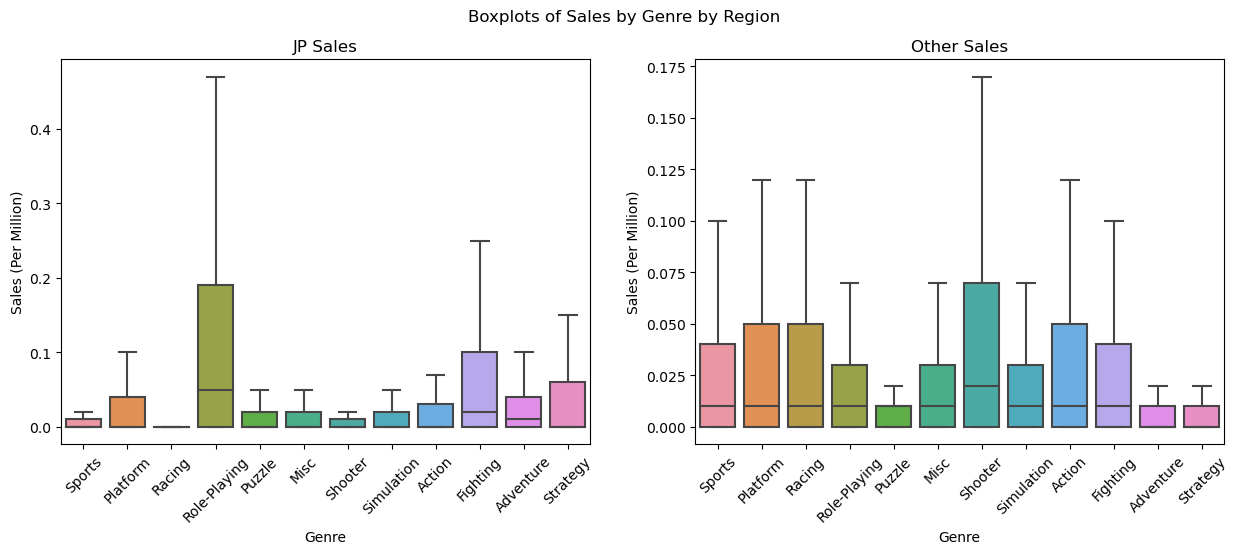

In [58]:
genre = vdata["Genre"].unique()

#Creating a subplot:
print("\n\nThe distribution of game sales by genre can be seen in the boxplots below:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Boxplots of Sales by Genre by Region')
#Plotting NA region sales in Subplot 1
sns.boxplot(x="Genre", y="JP_Sales", data=vdata, showfliers=False,ax=ax1)
ax1.tick_params(labelrotation=45, axis="x")
ax1.set_ylabel('Sales (Per Million)')
ax1.set_title('JP Sales')
#Plotting EU region sales in Subplot 2
ax2=sns.boxplot(x="Genre", y="Other_Sales", data=vdata, showfliers=False)
ax2.tick_params(labelrotation=45, axis="x")
ax2.set_ylabel('Sales (Per Million)')
ax2.set_title('Other Sales')
print("")

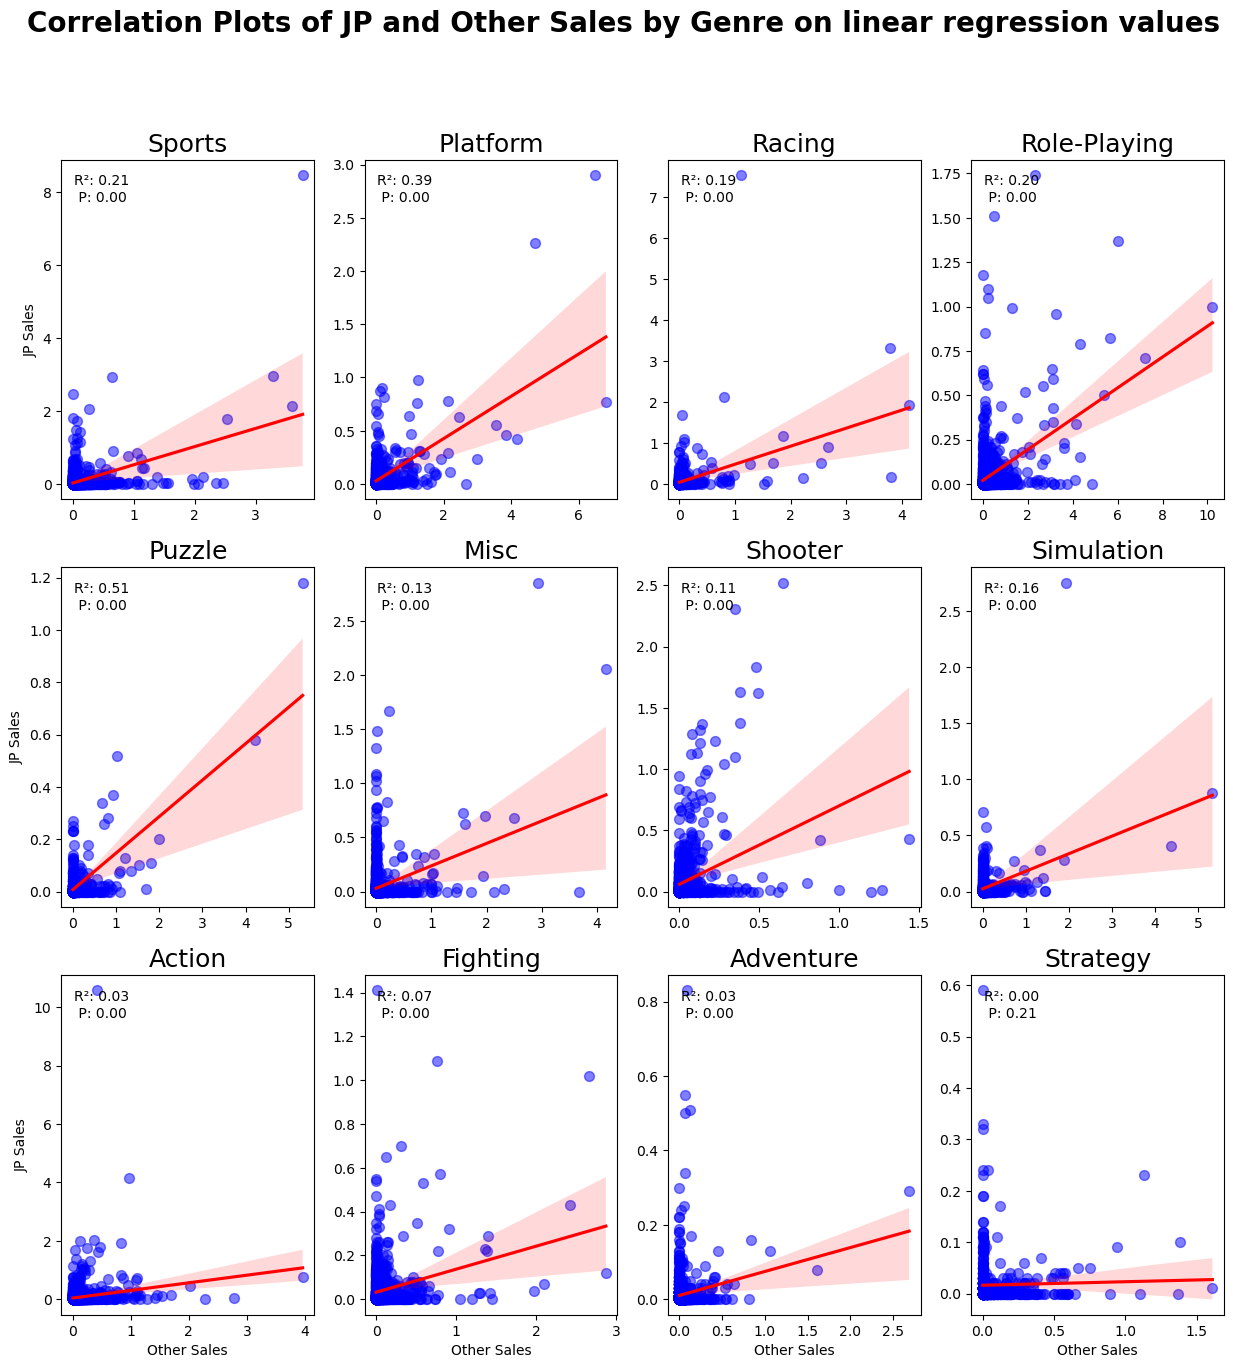

In [67]:
fig, axes = plt.subplots(3, 4, figsize=(15,15))
fig.suptitle(f'Correlation Plots of JP and Other Sales by Genre on linear regression values', fontsize=20, fontweight="bold", wrap=True)

x=0
y=0
z=0
for i in genre:
    bygenre = vdata.query(f"Genre == '{i}'")
    sns.regplot(data=bygenre, ax=axes[y,x], x="JP_Sales", y="Other_Sales",  scatter_kws={'color': 'blue', 'alpha': 0.5, 's': 50},
                line_kws={'color': 'red'},
                label=genre)
    axes[y,x].set_title(i, fontsize=18)
    datax = bygenre["JP_Sales"]
    datay = bygenre["Other_Sales"]
    res = stats.linregress(datax, datay)
    axes[y,x].text(0.05,0.925, f"R\u00b2: {res.rvalue**2:.2f}", transform=axes[y,x].transAxes)
    axes[y,x].text(0.05,0.875, f" P: {res.pvalue**2:.2f}", transform=axes[y,x].transAxes)

    if x==0:
        axes[y,x].set_ylabel('JP Sales')
    else:
        axes[y,x].set_ylabel('')
    if y==2:
        axes[y,x].set_xlabel('Other Sales')
    else:
        axes[y,x].set_xlabel('')
    x=x+1
    z=z+1
    if x==4:
        x=0
        y=y+1